# **Proyecto Guia Gastronomica**

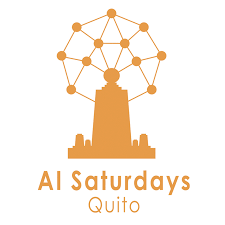

**Integrantes:**

* Fabio Burbano
* Danny Cuichan
* Paul Cuichan
* Alex German Chicaiza
* David Sagñay
* Cristian Yunga



## **1. Importacion de Recursos**

### **1.1 Librerias**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import graphviz
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

#SobreMuestreo
from imblearn.over_sampling import SMOTE

#Regresion Lineal
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#Arbol de Decision
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

#BAYES
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#Exportacion de datos
#import joblib
import pickle

### **1.2 DatataSet**

In [0]:
url='https://raw.githubusercontent.com/AlexGermancw/-Gastronomic_Guide/master/Data/data_gustos.csv'
data=pd.read_csv(url,sep=';')
data.head()

,id_restaurante,tipo,nombre,latitud,longitud,raiting,direccion,status,price_level,id_persona,nombre.1,genero,ambiente,vegetariana,carne,pollo,pez,lacteos,mariscos,menu,comida_rapida,menestra,jugo,gaseosa,bebida,cafe,te,gustar
0,86,cafe,Anaconda,-0.207061,-78.491673,4.4,"Jeronimo Carrion E9-41, Quito",OPERATIONAL,2,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,0
1,379,meal_takeaway,Beerman,-0.183650,-78.478547,4.5,Quito,OPERATIONAL,3,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,0
2,11,bakery,Cyrano,-0.196434,-78.478475,4.6,"Avenida GonzÃ¡lez SuÃ¡rez, GonzÃ¡lez SuÃ¡rez N...",OPERATIONAL,3,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,0
3,19,bakery,Dulssini,-0.208866,-78.492119,3.9,"La Mariscal, Edificio Mariana de JesÃºs, Avenu...",OPERATIONAL,1,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,1
4,387,meal_takeaway,El Hornero,-0.202156,-78.494419,4.5,"La Mariscal, Calle, Avenida General Ignacio de...",OPERATIONAL,2,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,0


## **2. Adecuacion del DataSet**

### **2.1 Categorizacion de Acuerdo al Raiting**

In [0]:
data.loc[(data['raiting'] > -1) & (data['raiting'] <= 1), "cat"] =1 
data.loc[(data['raiting'] > 1) & (data['raiting'] <= 2), "cat"] =2
data.loc[(data['raiting'] > 2) & (data['raiting'] <= 3), "cat"] =3 
data.loc[(data['raiting'] > 3) & (data['raiting'] <= 4), "cat"] =4 
data.loc[(data['raiting'] > 4) & (data['raiting'] <= 5), "cat"] =5 
data.head()

,id_restaurante,tipo,nombre,latitud,longitud,raiting,direccion,status,price_level,id_persona,nombre.1,genero,ambiente,vegetariana,carne,pollo,pez,lacteos,mariscos,menu,comida_rapida,menestra,jugo,gaseosa,bebida,cafe,te,gustar,cat
0,86,cafe,Anaconda,-0.207061,-78.491673,4.4,"Jeronimo Carrion E9-41, Quito",OPERATIONAL,2,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,0,5.0
1,379,meal_takeaway,Beerman,-0.183650,-78.478547,4.5,Quito,OPERATIONAL,3,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,0,5.0
2,11,bakery,Cyrano,-0.196434,-78.478475,4.6,"Avenida GonzÃ¡lez SuÃ¡rez, GonzÃ¡lez SuÃ¡rez N...",OPERATIONAL,3,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,0,5.0
3,19,bakery,Dulssini,-0.208866,-78.492119,3.9,"La Mariscal, Edificio Mariana de JesÃºs, Avenu...",OPERATIONAL,1,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,1,4.0
4,387,meal_takeaway,El Hornero,-0.202156,-78.494419,4.5,"La Mariscal, Calle, Avenida General Ignacio de...",OPERATIONAL,2,123,alex,1,abierto,0,1,1,1,1,1,0,1,1,0,1,2,0,1,0,5.0


### **2.2 Cuantificar Variables Cualitativas** 

#### *2.2.1 Tipo*

In [0]:
data['tipo'].value_counts()

meal_takeaway    9
bakery           9
cafe             9
restaurant       9
food             6
Name: tipo, dtype: int64

REEMPLAZAMOS LAS CATEGORIAS DIFERENTES QUE TENEMOS EN VARIABLE **tipo**  
  
  cafe_____________ 1  
  bakery___________ 2  
  food_____________ 3  
  meal_takeaway__ 4  
  restaurant_______ 5  

In [0]:
tipo=['cafe','bakery','food','meal_takeaway','restaurant']
remplace_tipo=[1,2,3,4,5]
data['tipo'].replace(tipo,remplace_tipo,inplace=True)
data['tipo'].value_counts()

5    9
4    9
2    9
1    9
3    6
Name: tipo, dtype: int64

#### *2.2.2 Ambiente*

In [0]:
data['ambiente'].value_counts()

abierto    28
cerrado    14
Name: ambiente, dtype: int64

REEMPLAZAMOS LAS CATEGORIAS DIFERENTES QUE TENEMOS EN VARIABLE **ambiente**  
  
  cerrado__________ 0   
  abierto__________ 1  

In [0]:
ambiente=['cerrado','abierto']
remplace_ambiente=[0,1]
data['ambiente'].replace(ambiente,remplace_ambiente,inplace=True)
data['ambiente'].value_counts()

1    28
0    14
Name: ambiente, dtype: int64

## **2.3 Normalizacion de Valores**
Se normalizan valores. Ejemplo: Si una variable contiene valores del 1 al 2, se normaliza a 0 y 1

### *2.3.1 Bebida*

In [0]:
data['bebida'].value_counts()

1    28
2    14
Name: bebida, dtype: int64

NORMALIZAMOS LOS VALORES QUE TENEMOS EN LA VARIABLE **bebida**  
  
  1__________ 0   
  2__________ 1  


In [0]:
bebida=[1,2]
remplace_bebida=[0,1]
data['bebida'].replace(bebida,remplace_bebida,inplace=True)
data['bebida'].value_counts()

0    28
1    14
Name: bebida, dtype: int64

## **2.4 Eliminacion de variables no numericas**
Considerando que hay una variable numerica que representa lo mismo

In [0]:
data.head()

,id_restaurante,tipo,nombre,latitud,longitud,raiting,direccion,status,price_level,id_persona,nombre.1,genero,ambiente,vegetariana,carne,pollo,pez,lacteos,mariscos,menu,comida_rapida,menestra,jugo,gaseosa,bebida,cafe,te,gustar,cat
0,86,1,Anaconda,-0.207061,-78.491673,4.4,"Jeronimo Carrion E9-41, Quito",OPERATIONAL,2,123,alex,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,5.0
1,379,4,Beerman,-0.183650,-78.478547,4.5,Quito,OPERATIONAL,3,123,alex,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,5.0
2,11,2,Cyrano,-0.196434,-78.478475,4.6,"Avenida GonzÃ¡lez SuÃ¡rez, GonzÃ¡lez SuÃ¡rez N...",OPERATIONAL,3,123,alex,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,5.0
3,19,2,Dulssini,-0.208866,-78.492119,3.9,"La Mariscal, Edificio Mariana de JesÃºs, Avenu...",OPERATIONAL,1,123,alex,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,1,4.0
4,387,4,El Hornero,-0.202156,-78.494419,4.5,"La Mariscal, Calle, Avenida General Ignacio de...",OPERATIONAL,2,123,alex,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,5.0


In [0]:
data.drop(['nombre','direccion','status','nombre.1','id_persona'], axis = 1, inplace=True)
data.head()

,id_restaurante,tipo,latitud,longitud,raiting,price_level,genero,ambiente,vegetariana,carne,pollo,pez,lacteos,mariscos,menu,comida_rapida,menestra,jugo,gaseosa,bebida,cafe,te,gustar,cat
0,86,1,-0.207061,-78.491673,4.4,2,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,5.0
1,379,4,-0.183650,-78.478547,4.5,3,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,5.0
2,11,2,-0.196434,-78.478475,4.6,3,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,5.0
3,19,2,-0.208866,-78.492119,3.9,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,1,4.0
4,387,4,-0.202156,-78.494419,4.5,2,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,5.0


In [0]:
data.dtypes

id_restaurante      int64
tipo                int64
latitud           float64
longitud          float64
raiting           float64
price_level         int64
genero              int64
ambiente            int64
vegetariana         int64
carne               int64
pollo               int64
pez                 int64
lacteos             int64
mariscos            int64
menu                int64
comida_rapida       int64
menestra            int64
jugo                int64
gaseosa             int64
bebida              int64
cafe                int64
te                  int64
gustar              int64
cat               float64
dtype: object

In [0]:
data.describe()

,id_restaurante,tipo,latitud,longitud,raiting,price_level,genero,ambiente,vegetariana,carne,pollo,pez,lacteos,mariscos,menu,comida_rapida,menestra,jugo,gaseosa,bebida,cafe,te,gustar,cat
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,253.428571,3.000000,-0.201763,-78.484903,4.350000,1.928571,0.666667,0.666667,0.333333,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.666667,0.619048,4.928571
std,167.846495,1.481594,0.006700,0.005479,0.222239,0.808276,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.477119,0.491507,0.260661
min,11.000000,1.000000,-0.210622,-78.494419,3.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,86.000000,2.000000,-0.206758,-78.488673,4.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,296.500000,3.000000,-0.202706,-78.484480,4.400000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000
75%,393.000000,4.000000,-0.198305,-78.479424,4.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
max,481.000000,5.000000,-0.183650,-78.477604,4.600000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


# **3. Correlaciones entre variables**

## **3.1 Grafica de Correlaciones**
Se Crea una funcion para graficar la correlacion en un mapa de calor

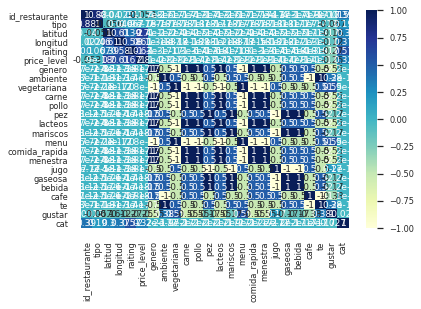

In [0]:
def dibuja_Correlacion(df):
  sns.set(style="white",font_scale=0.75)
  corr = df.corr('pearson')
  sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, 
            cmap="YlGnBu",
            annot=True,
            center=0,)
dibuja_Correlacion(data)

**Conclusion:** Se va a analizar en 2 diferentes bloques. y se elimina la variable fast_food  
*Bloque1:* id_restaurante, tipo, latitud, longitud, rating, price level, gustar y cat  
*Bloque 2:* id_persona, genero, ambiente, vegetariana, carne, pollo, pez, lacteos, mariscos, menu, menestra, jugo, gaseosa, cafe, te, gustar

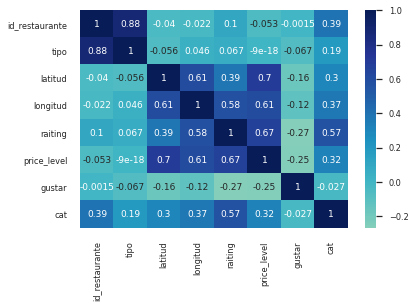

In [0]:
bloque1=data[['id_restaurante', 'tipo', 'latitud', 'longitud', 'raiting', 'price_level', 'gustar', 'cat']]
dibuja_Correlacion(bloque1)

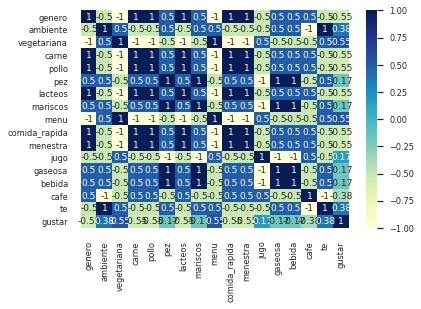

In [0]:
bloque2=data.drop(['id_restaurante', 'tipo', 'latitud', 'longitud', 'raiting', 'price_level', 'cat'],axis=1)
dibuja_Correlacion(bloque2)

In [0]:
corr = data.corr()
corr[['gustar']].sort_values(by = 'gustar',ascending = False).style.background_gradient()

,gustar
gustar,1.000000
menu,0.554700
vegetariana,0.554700
ambiente,0.381356
te,0.381356
jugo,0.173344
id_restaurante,-0.001520
cat,-0.027196
tipo,-0.066986
longitud,-0.118607


## **3.2 Datos Finales**
Se eliminan las variables poco correlacionadas y se crea una copia Original

In [0]:
se_elimina=[
            'jugo',
            'id_restaurante',
            'cat',
            'tipo',
            'longitud',
            'latitud',
            'pez',
            'mariscos',
            'gaseosa',
            'bebida',
            'price_level',
            'raiting',   
            'cafe',
            'te',         
            ]
data.drop(se_elimina,axis=1,inplace=True)
data_original=data.copy()
data_original.to_csv('GG_data.csv')

### *3.2.1 Resumen y verificacion de Datos*

El total de Datos es  42
Numero de  gustar   26
Numero de NO gustar   16
probabilidad de  gustar   61.904761904761905 %
probabilidad de NO gustar   38.095238095238095 %


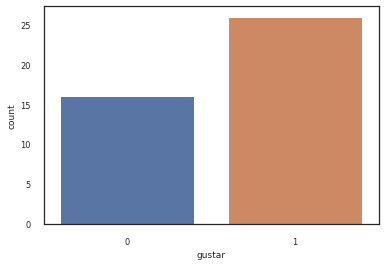

In [0]:
def print_prob(df,variable):
  cont_vive=len(df[df[variable]==1])
  cont_no_vive=len(df[df[variable]==0])
  cont_total=len(df[variable])
  prob_vive=cont_vive/(cont_total)
  prob_no_vive=cont_no_vive/(cont_total)

  print('probabilidad de ',variable,' ', prob_vive*100,'%')
  print('probabilidad de NO',variable,' ', prob_no_vive*100,'%')

def resumen_datos(df,variable):
  print("El total de Datos es ",len(df))
  print("Numero de ",variable,' ',len(df[df[variable]==1]))
  print("Numero de NO",variable,' ',len(df[df[variable]==0]))
  print_prob(df,variable)
  sns.countplot(x=variable,data=df)

resumen_datos(data,'gustar')

### *3.2.2 Separamiento de datos de entrenamiento y test*
Por la cantidad de datos, se ejecuta el codigo hasta que las probabilidades sean similares al resumen de datos completo

El total de Datos es  29
Numero de  gustar   18
Numero de NO gustar   11
probabilidad de  gustar   62.06896551724138 %
probabilidad de NO gustar   37.93103448275862 %
El total de Datos es  13
Numero de  gustar   8
Numero de NO gustar   5
probabilidad de  gustar   61.53846153846154 %
probabilidad de NO gustar   38.46153846153847 %


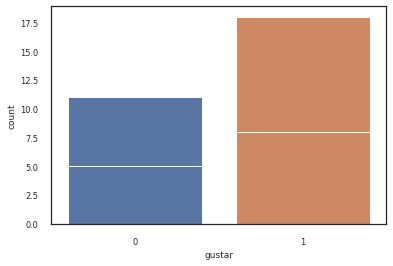

In [0]:
while True:
  msk = np.random.rand(len(data)) < 0.7
  data_train = data[msk]
  data_test = data[~msk]
  
  if len(data_train[data_train['gustar']==1])==18 and len(data_train[data_train['gustar']==0])==11 :
    break

resumen_datos(data_train,'gustar')
resumen_datos(data_test,'gustar')

### *3.2.3 Separamiento de Y y X de un dataset*

In [0]:
def obtener_YX(df,variableY):
  X = df.loc[:, df.columns != variableY]
  Y = df.loc[:, df.columns == variableY]
  return(Y,X)

# **4. Regresion Logistica**

## **4.4 Sobremuestreo de Datos**
Debido a que los datos totales muestran una probabilidad cercanas a 60% y 40%, se realiza un sobremuestreo de datos para que las probabilidades se igualen

In [0]:
os = SMOTE(random_state=0)

Y_train,X_train=obtener_YX(data_train,'gustar')

#X_train.drop(['id_restaurante', 'tipo', 'latitud', 'longitud', 'raiting', 'price_level', 'cat'],axis=1,inplace=True)

os_data_X,os_data_Y=os.fit_sample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns)
os_data_Y = pd.DataFrame(data=os_data_Y,columns=Y_train.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


El total de Datos es  36
Numero de  gustar   18
Numero de NO gustar   18
probabilidad de  gustar   50.0 %
probabilidad de NO gustar   50.0 %


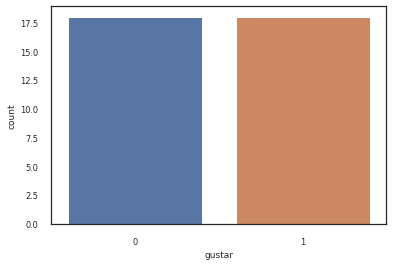

In [0]:
resumen_datos(os_data_Y,'gustar')


## **4.5 Verificacion de Datos Utiles para la Regresion Logistica**

In [0]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
X_train_LR=X_train[X_train.columns[rfe.support_]]
Y_train_LR=Y_train
X_train_LR.head()

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


,genero,ambiente,vegetariana,carne,pollo,lacteos,menu,comida_rapida,menestra
1,1,1,0,1,1,1,0,1,1
2,1,1,0,1,1,1,0,1,1
3,1,1,0,1,1,1,0,1,1
5,1,1,0,1,1,1,0,1,1
6,1,1,0,1,1,1,0,1,1


In [0]:
"""
METODOS:
  newton ---> for Newton-Raphson, ‘nm’ for Nelder-Mead

  bfgs ---> for Broyden-Fletcher-Goldfarb-Shanno (BFGS)

  lbfgs ---> for limited-memory BFGS with optional box constraints

  powell ---> for modified Powell’s method

  cg ---> for conjugate gradient

  ncg ---> for Newton-conjugate gradient

  basinhopping ---> for global basin-hopping solver

  minimize ---> for generic wrapper of scipy minimize (BFGS by default)
"""
metodo_LR='newton'
try:
  logit_model=sm.Logit(Y_train_LR,X_train_LR)#.drop(se_elimina,axis=1))
  result=logit_model.fit(method=metodo_LR)
  print(result.summary2())
except:
  print("Error por datos -----> Matriz Singular") 


Optimization terminated successfully.
         Current function value: 0.461826
         Iterations 33
Error por datos -----> Matriz Singular


In [0]:
se_elimina=[
            #'tipo',
            #'latitud',
            #'longitud',
            #'raiting',
            #'price_level',
            #'genero',
            #'ambiente',
            #'vegetariana',
            #'carne',
            #'pollo',
            #'pez',
            #'lacteos',
            #'mariscos',
            #'menu',
            #'comida_rapida',
            #'menestra',
            #'jugo'
            #'gaseosa',
            #'bebida',
            #'cafe',
            #'te',
            #'cat',
            ]
try:
  logit_model=sm.Logit(Y_train_LR,X_train_LR)#.drop(se_elimina,axis=1))
  result=logit_model.fit(method=metodo_LR)
  print(result.summary2())
except:
  print("Error por datos -> Matriz Singular") 


Optimization terminated successfully.
         Current function value: 0.461826
         Iterations 33
Error por datos -> Matriz Singular


## **4.6 Conclusiones**
Es necesario una mayor cantidad de datos para que la regresion logistica encuentre un patron, en este caso nos da error de matriz singular de forma aleatoria.

# **5. Arbol de Decision**

## **5.1 Obtencion de datos de entrenamiento y test**

In [0]:
Y_train,X_train=obtener_YX(data_train,'gustar')
Y_test,X_test=obtener_YX(data_test,'gustar')



## **5.2 Entrenamiento y Obtencion de Resultados**

In [0]:
decision_tree = DecisionTreeClassifier() 
decision_tree_fitted = decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test) 

In [0]:
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 5)
print ("El accuracy con los datos de entrenamiento es: \n",acc_decision_tree)

acc_decision_tree_test = round(decision_tree.score(X_test, Y_test) * 100, 5)
print ("El accuracy con los datos de validación es: \n",acc_decision_tree_test)

El accuracy con los datos de entrenamiento es: 
 72.41379
El accuracy con los datos de validación es: 
 69.23077


# **6. Random Forest**

## **6.1 Obtencion de datos de entrenamiento y test**

In [0]:
Y_train,X_train=obtener_YX(data_train,'gustar')
Y_test,X_test=obtener_YX(data_test,'gustar')

## **6.2 Entrenamiento y Obtencion de Resultados**

In [0]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)


acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("El accuracy con los datos de entrenamiento es: ",acc_random_forest)

acc_random_forest_test = round(random_forest.score(X_test, Y_test) * 100, 2)
print("El accuracy con los datos de validación es: ",acc_random_forest_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


El accuracy con los datos de entrenamiento es:  72.41
El accuracy con los datos de validación es:  69.23


# **7. Bayes**

## **7.1 Obtencion de datos de entrenamiento y test**

In [0]:
Y_train,X_train=obtener_YX(data_train,'gustar')
Y_test,X_test=obtener_YX(data_test,'gustar')

## **7.2 Entrenamiento y Obtencion de Resultados**

In [0]:
NB = GaussianNB()
NB_ajustado = NB.fit(X_train, Y_train)

y_pred = NB_ajustado.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print("La matriz de confusión es: \n",cnf_matrix,"\n")

acc_NB = round(NB.score(X_train, Y_train) * 100, 2)
print ("El accuracy de los datos de entrenamiento es: \n",acc_NB)

acc_NB_test = round(NB.score(X_test, Y_test) * 100, 2)
print ("El accuracy con los datos de validación modelo es: \n",acc_NB_test)

La matriz de confusión es: 
 [[5 0]
 [3 5]] 

El accuracy de los datos de entrenamiento es: 
 68.97
El accuracy con los datos de validación modelo es: 
 76.92


# **8. Exportacion del modelo** 

In [0]:
import pickle
 
pickle_file = open('GG_Bayes.sav', 'wb')
pickle.dump(NB_ajustado, pickle_file)
pickle_file.close()

In [0]:
data_original

,genero,ambiente,vegetariana,carne,pollo,lacteos,menu,comida_rapida,menestra,gustar
0,1,1,0,1,1,1,0,1,1,0
1,1,1,0,1,1,1,0,1,1,0
2,1,1,0,1,1,1,0,1,1,0
3,1,1,0,1,1,1,0,1,1,1
4,1,1,0,1,1,1,0,1,1,0
5,1,1,0,1,1,1,0,1,1,1
6,1,1,0,1,1,1,0,1,1,1
7,1,1,0,1,1,1,0,1,1,0
8,1,1,0,1,1,1,0,1,1,0
9,1,1,0,1,1,1,0,1,1,0


In [0]:
import sklearn; sklearn.show_versions()


System:
    python: 3.6.9 (default, Apr 18 2020, 01:56:04)  [GCC 8.4.0]
executable: /usr/bin/python3
   machine: Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 19.3.1
setuptools: 46.3.0
   sklearn: 0.22.2.post1
     numpy: 1.18.4
     scipy: 1.4.1
    Cython: 0.29.18
    pandas: 1.0.3
matplotlib: 3.2.1
    joblib: 0.15.1

Built with OpenMP: True


In [0]:
!pip install -U sklearn


Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [0]:
#!pip install six

In [0]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 163kB 5.0MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
import pickle

infile = open('GG_Bayes.sav','rb')
NB_ajustado = pickle.load(infile)
infile.close()